In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.close('all')
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

In [60]:
df = pd.read_csv("data.csv")
df.head(4)
df = df[df["trust"].isin(["No sabe", "No", "Sí"])]
df

,time,age,education,area,app_use,device,first_look,easy_information,comprehensible,colors,font,choices,navigation,order_navigation,trust,custom,change,order_detail
0,10/19/2019 23:39:47,Mayores 40,Primario Completo,Comercio,2.0,Celular,Esta nuy buena la aplicacion.exelente!!,4.0,4.0,Si,5.0,No,3.0,No,Sí,5.0,Nada,Muy bien detallado.
1,10/20/2019 12:18:04,Entre 15 y 21 años,Secundario Incompleto,Tecnología,4.0,Celular,NaN,4.0,5.0,Si,5.0,No,3.0,No,Sí,5.0,NaN,NaN
2,10/20/2019 12:23:23,Entre 21 y 30 años,Universitario Incompleto,Matemáticas,4.0,Celular,N,4.0,5.0,Si,5.0,No,3.0,Si,Sí,5.0,Nada,Ok
3,10/20/2019 13:56:47,Entre 21 y 30 años,Universitario Incompleto,Matemáticas,4.0,Celular,Kcyo,3.0,5.0,Si,5.0,"Si, copiense de pedidos ya(?",2.0,Si,Sí,4.0,Botones más cómodos e intuitivos para gente mayor,Bien
4,10/20/2019 14:01:19,Entre 21 y 30 años,Universitario Incompleto,Arte,4.0,Celular,Piola,3.0,4.0,Si,5.0,Tal vez,2.0,No,Sí,4.0,Una notificación cuando tenes pedidos pendient...,Bien detallado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,11/1/2019 21:41:32,Entre 21 y 30 años,Universitario Incompleto,Ciencia,4.0,Celular,Le falta más diseño para mi. Algo que resalte ...,4.0,5.0,Si,5.0,Nada que se me ocurra.,3.0,No,Sí,5.0,"Más que nada diseño es lo que le falta, el res...","Me pareció una idea excelente, me encantó la i..."
76,11/1/2019 22:10:18,Mayores 40,Secundario Incompleto,Tecnología,3.0,Celular,Muy buena,4.0,5.0,Si,5.0,No,2.0,No,Sí,4.0,Nada,Exelente
78,11/2/2019 10:27:56,Entre 30 y 40 años,Universitario Completo,Ingeniería,3.0,Celular,"Simple, minimalista",4.0,4.0,Si,4.0,Si fuera para pedido on line faltaría el métod...,2.0,Si,Sí,4.0,NaN,"Simple, clara"
79,11/4/2019 19:20:03,Entre 30 y 40 años,Secundario Completo,Comercio,2.0,Celular,Buena,4.0,5.0,Si,5.0,"Si, Mas variedad",3.0,No,No,5.0,NaN,Bastante clara con plato y precio


# Aca analizamos tal cosa
- esto
- lo otro

In [3]:
ages_group = df.groupby("age")
ages = ages_group["age"].count()
ages


age
Entre 15 y 21 años     8
Entre 21 y 30 años    23
Entre 30 y 40 años    25
Mayores 40            23
Name: age, dtype: int64

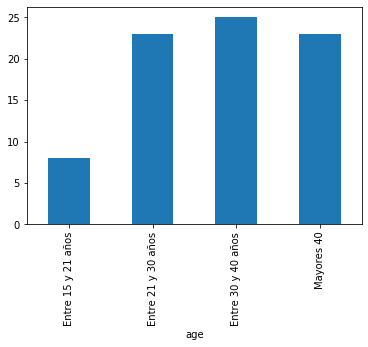

In [5]:
ages.plot.bar()

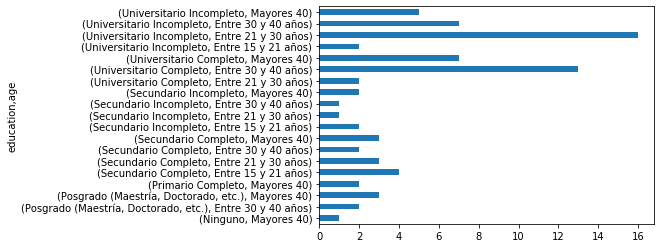

In [87]:
age_edutacion_area = df[["age", "education", "area"]].dropna()
#age_edutacion_area.plot(kind="scatter",x="age",y="education")
age_edutacion_area[df[""]].groupby(["education", "age"]).size().plot.barh()

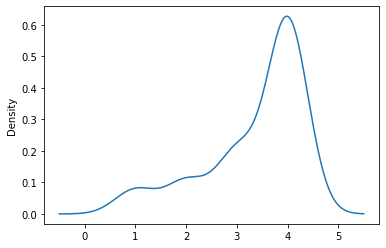

In [50]:
df["app_use"].plot.density()

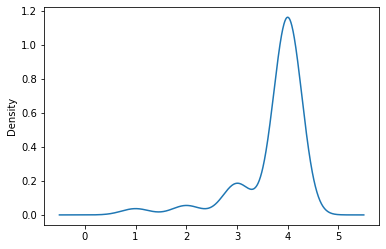

In [7]:
df["easy_information"].plot.density()

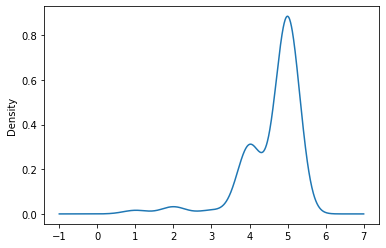

In [64]:
df["comprehensible"].plot.density()

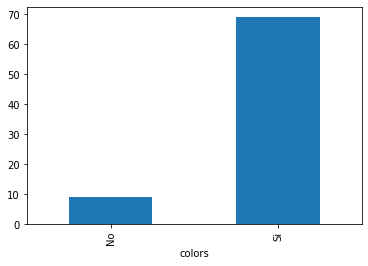

In [76]:
df.groupby("colors").size().plot.bar()

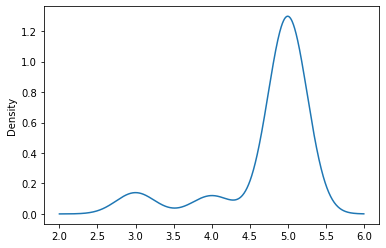

In [77]:
df["font"].plot.density()

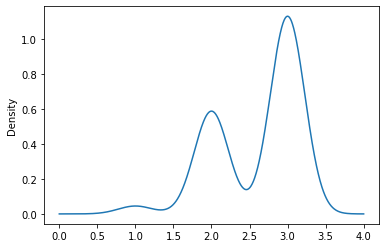

In [91]:
df["navigation"].plot.density()

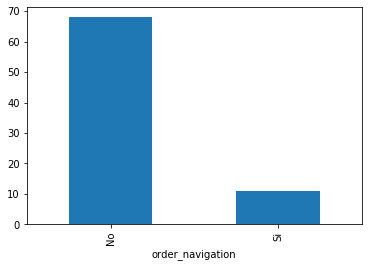

In [79]:
df.groupby("order_navigation").size().plot.bar()

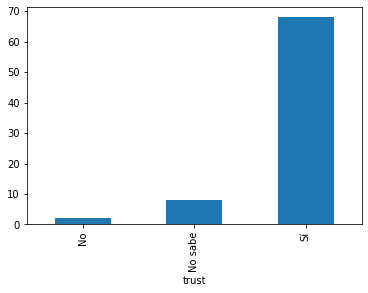

In [19]:
df.groupby("trust").size().plot.bar()

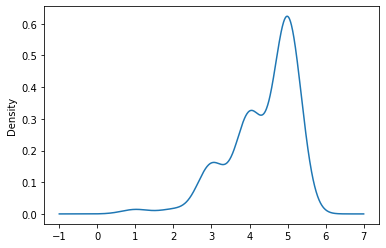

In [81]:
df["custom"].plot.density()

- Por edades, personas que no sean de tecnología que les parezca segura la app
- Queremos ver para las personas que son de rubros que no son de sistemas, si confiarían en una app así.

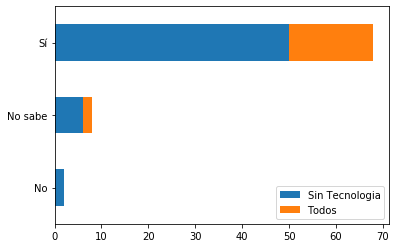

In [84]:
col1 = df[df["area"] != "Tecnología"].groupby("trust").size()
col2 = df[df["area"] == "Tecnología"].groupby("trust").size()
pd.DataFrame({
    "Sin Tecnologia": col1, "Todos": col2
}).plot.barh(stacked=True)

- Por edades y por nivel, pesonas que no sean de tecnología que les parezca facil de usar.
- Para personas que son de otros rubros qué tan facil les parece según su nivel de estudios.

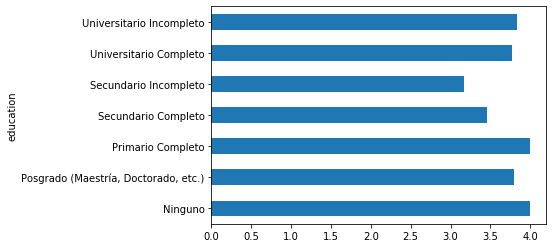

In [99]:
df.groupby(["education"])["easy_information"].describe()["mean"].plot.barh()

In [78]:
app_use = df.groupby(["app_use","comprehensible"]).size()
#app_use.plot.scatter(x="app_use", y="comprehensible", color="red", s=100)
#app_use[["app_use", "comprehensible"]]
app_use

app_use  comprehensible
1.0      4.0                3
         5.0                2
2.0      4.0                1
         5.0                7
3.0      4.0                5
         5.0               10
4.0      1.0                1
         2.0                2
         3.0                1
         4.0                8
         5.0               36
dtype: int64

In [110]:
df.groupby(["age"])["easy_information"].describe()
df[df["age"] == "Entre 30 y 40 años"]["easy_information"]

8     4.0
9     4.0
11    4.0
15    4.0
18    4.0
21    4.0
23    4.0
27    4.0
36    4.0
37    4.0
46    4.0
54    4.0
56    3.0
57    4.0
58    4.0
59    4.0
60    3.0
61    4.0
62    4.0
64    4.0
66    4.0
70    3.0
78    4.0
79    4.0
80    4.0
Name: easy_information, dtype: float64

In [ ]:
Por edades y profesion,
 Para generar un pedido tuvo que navegar varias veces por la misma pantalla? AGE, EDUCATION, NAVIGATION


In [ ]:
Por edades, tamaño de letra. AGE, FONT

In [ ]:
Info de forma clara, por edad y profesion. AGE, EDUCATION, comprehensible

# Resultados Entrevista

In [57]:
df = pd.read_csv("interviews.csv")
df["use_delivery2"] = df.apply(lambda row: (True,False)[row.use_delivery == "si"], axis=1)
df["winner"] = df.apply(lambda row: ("paper","app")[row.paper_time > row.app_time], axis=1)
df

,age,profession,order,paper_time,app_time,frecuency,use_delivery,use_restaurant,worst_moment,time,...,intuition,would_use,recommend,easy,remove_paper,doubts,benefits,waiter,use_delivery2,winner
0,27,Sistemas,CA,40,60,Dos veces por mes,si,no,Pagar,10,...,5,si,5,No sabe,no,si,Menos costo,no,False,paper
1,45,Sistemas,AC,95,150,Dos veces por mes,no,no,Esperar el pedido,10,...,4,si,4,Aplicación,no,si,Rapidez,no,True,paper
2,55,Comerciante,CA,133,80,Una por mes,si,no,Esperar el pedido,10,...,5,no,1,Aplicación,no,no,Ninguno,si,False,app
3,50,Comerciante,AC,60,80,Una por mes,no,no,Esperar el pedido,5,...,4,no,4,No sabe,no,si,Rapidez,si,True,paper
4,25,Deporte,AC,55,70,Más de 4 veces,si,si,Esperar el pedido,10,...,5,si,5,Carta,no,no,Rapidez,no,False,paper
5,55,Arquitectura,AC,80,157,Más de 4 veces,no,si,Esperar el pedido,0,...,3,si,3,Aplicación,si,si,Rapidez,no,True,paper
6,46,Docencia,CA,120,80,Dos veces por mes,no,no,Salir de casa,0,...,3,no,3,Carta,no,si,Rapidez,si,True,app
7,27,Industria,CA,120,60,Una por mes,si,no,Esperar el pedido,15,...,5,si,4,Carta,no,no,Ninguno,no,False,app
8,25,Docencia,CA,180,120,Más de 4 veces,si,no,Esperar el pedido,10,...,5,si,5,Aplicación,no,no,Ninguno,no,False,app
9,30,Industria,AC,65,52,Dos veces por mes,si,no,Pagar,15,...,4,si,5,Carta,si,no,Rapidez,no,False,app


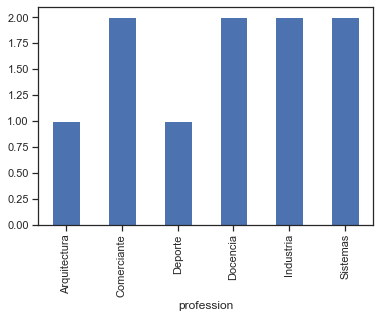

In [4]:
df.groupby("profession").size().plot.bar()

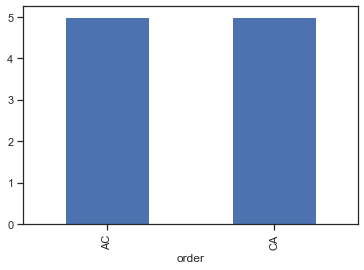

In [5]:
df.groupby("order").size().plot.bar()

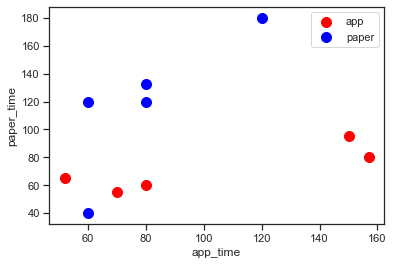

In [59]:
app = df[df["order"] == "AC"]
paper = df[df["order"] == "CA"]
ax = app.plot.scatter(x="app_time", y="paper_time", color="red", label="app", s=100)
paper.plot.scatter(x="app_time", y="paper_time", color="blue", label="paper", s=100, ax=ax)

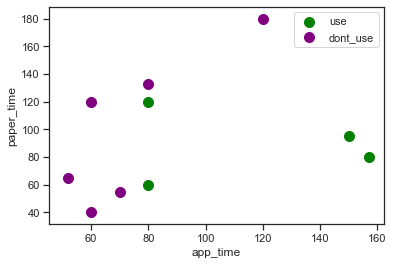

In [20]:
use = df[df["use_delivery2"] == True]
no_use = df[df["use_delivery2"] == False]
ax = use.plot.scatter(x="app_time", y="paper_time", color="green", label="use", s=100)
no_use.plot.scatter(x="app_time", y="paper_time", color="purple", label="dont_use", s=100, ax=ax)

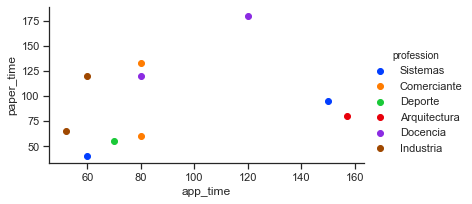

In [7]:
fg = seaborn.FacetGrid(data=df, hue='profession', palette="bright", aspect=1.8)
fg.map(pyplot.scatter, 'app_time', 'paper_time').add_legend()

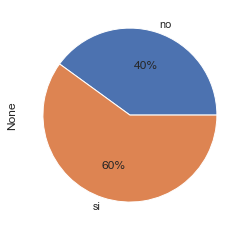

In [180]:
df.groupby("use_delivery").size().plot.pie(autopct='%d%%')

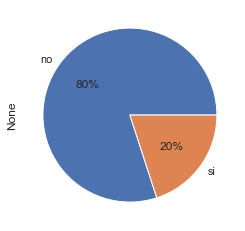

In [181]:
df.groupby("use_restaurant").size().plot.pie(autopct='%d%%')

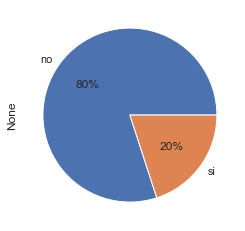

In [182]:
df.groupby("remove_paper").size().plot.pie(autopct='%d%%')

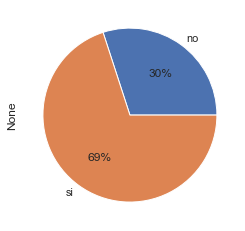

In [184]:
df.groupby("would_use").size().plot.pie(autopct='%d%%')

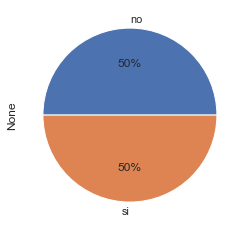

In [21]:
df.groupby("doubts").size().plot.pie(autopct='%d%%')

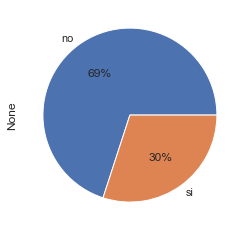

In [22]:
df.groupby("waiter").size().plot.pie(autopct='%d%%')

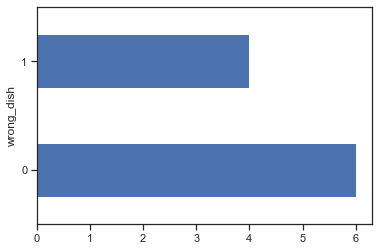

In [193]:
df.groupby("wrong_dish").size().plot.barh()

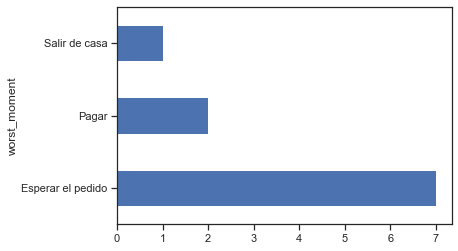

In [187]:
df.groupby("worst_moment").size().plot.barh()

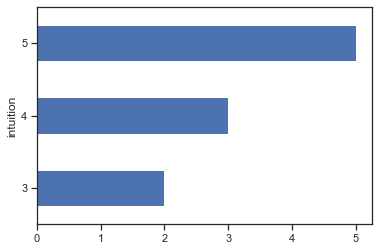

In [188]:
df.groupby("intuition").size().plot.barh()

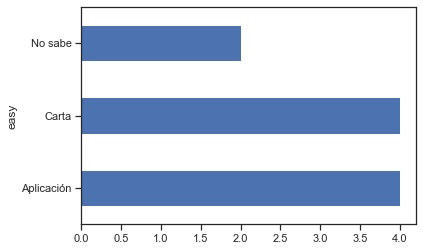

In [194]:
df.groupby("easy").size().plot.barh()

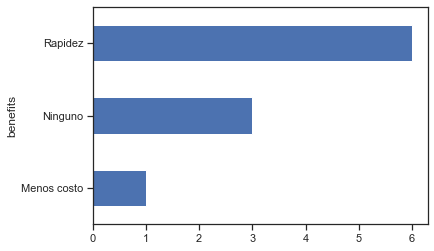

In [23]:
df.groupby("benefits").size().plot.barh()

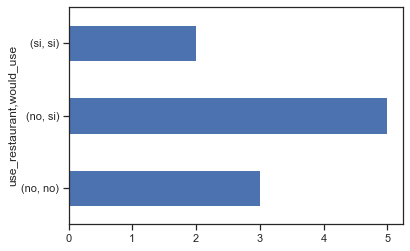

In [218]:
df.groupby(["use_delivery","would_use"]).size().plot.barh()

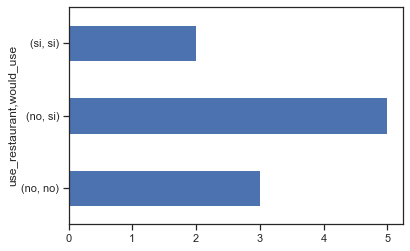

In [219]:
df.groupby(["use_restaurant","would_use"]).size().plot.barh()